# Jet sorts

**Goal:** Compare the $p_T$ vs $D_b$ sorts for 
1. 4b
2. 3b + 1 loose

And maybe then I can start making some plots comparing the different pairing algos??

In [5]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import json
from itertools import product
from glob import glob
import uproot

import matplotlib.pyplot as plt
from matplotlib import gridspec
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  
from sklearn.preprocessing import StandardScaler

import os

os.sys.path.append('../GraphNN')
from preprocess import processDf,process4bs, mcToYr

os.sys.path.append('../code/')
from analysis import fileDir, normalizeWeight
from plotting import SR_x, SR_y1, SR_y2
from plotting import CR_x, CR_y1, CR_y2
from plotting import SB_x, SB_y1, SB_y2

# Let's do ATLAS style plots too!
import matplotlib as mpl
os.sys.path.append( "../PyATLASstyle/")
import PyATLASstyle as pas
pas.applyATLASstyle(mpl)

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


../PyATLASstyle/PyATLASstyle.py:12: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.
  font_list = font_manager.createFontList(font_files)


**Step 1:** Process the 4 jets

In [29]:
physicsSample = 'SMNR'
mc='mc16a'
prodTag = 'JUN2020'

In [26]:
subDir = f'{physicsSample}_{mc}_PFlow-{prodTag}'

filenames = glob(fileDir[subDir]+'*.root')
assert len(filenames) == 1

filename = filenames[0]

In [27]:
t = uproot.open(filename)[b'XhhMiniNtuple']

In [30]:
filename

'/gpfs/slac/atlas/fs1/d/nhartman/public/hh4b/kappa_lambda/user.valentem.HH4B.600043.HH_FullTop.MC16a-2015-2016.AB21.2.91-JUN20-1.full_MiniNTuple.root/user.valentem.22740909._000001.MiniNTuple.root'

In [31]:
for k in t.keys():
    print(k)

b'runNumber'
b'eventNumber'
b'lumiBlock'
b'coreFlags'
b'bcid'
b'mcEventNumber'
b'mcChannelNumber'
b'mcEventWeight'
b'NPV'
b'actualInteractionsPerCrossing'
b'averageInteractionsPerCrossing'
b'weight_pileup'
b'correctedAverageMu'
b'correctedAndScaledAverageMu'
b'correctedActualMu'
b'correctedAndScaledActualMu'
b'rand_run_nr'
b'rand_lumiblock_nr'
b'passedTriggerHashes'
b'unmatchedTriggerHashes'
b'nresolvedJets'
b'resolvedJets_E'
b'resolvedJets_pt'
b'resolvedJets_phi'
b'resolvedJets_eta'
b'resolvedJets_NumTrkPt1000PV'
b'resolvedJets_SumPtTrkPt1000PV'
b'resolvedJets_TrackWidthPt1000PV'
b'resolvedJets_NumTrkPt500PV'
b'resolvedJets_SumPtTrkPt500PV'
b'resolvedJets_TrackWidthPt500PV'
b'resolvedJets_JVFPV'
b'resolvedJets_JvtJvfcorr'
b'resolvedJets_JvtRpt'
b'resolvedJets_Jvt'
b'resolvedJets_JvtPass_Loose'
b'resolvedJets_JvtEff_SF_Loose'
b'resolvedJets_JvtPass_Medium'
b'resolvedJets_JvtEff_SF_Medium'
b'resolvedJets_JvtPass_Tight'
b'resolvedJets_JvtEff_SF_Tight'
b'resolvedJets_fJvtPass_Medium'
b're

In [32]:
jvc = t.array(b'resolvedJets_JetVertexCharge_discriminant')

In [13]:
jvc

<JaggedArray [[-0.6245429515838623 -0.15482667088508606 0.1786668300628662 0.24256958067417145 0.45312100648880005 -0.03838746249675751] [-1.655821442604065 -0.21793368458747864 -0.4637015163898468 0.36751750111579895 0.26739010214805603 -7.0] [0.7135022282600403 -0.4651367664337158 0.6741234660148621 -7.0 1.1568466424942017] ... [0.5951672196388245 -0.7645764350891113 -0.3889687955379486 ... -0.31878140568733215 -0.8629485368728638 -0.5579421520233154] [0.46921223402023315 -0.6982335448265076 -0.8883379101753235 ... -0.8190260529518127 0.588929295539856 -0.5384286046028137] [0.15096257627010345 -7.0 -0.8980712890625 0.8861989378929138 0.007499635685235262 -7.0]] at 0x7f5b3319e210>

In [33]:
pdg = t.array(b'resolvedJets_HadronConeExclTruthLabelID')

In [16]:
np.unique(pdg.flatten())

array([ 0,  4,  5, 15], dtype=int32)

In [20]:
jvc[pdg==0]

<JaggedArray [[0.24256958067417145 0.45312100648880005] [-0.4637015163898468 0.26739010214805603 -7.0] [-0.4651367664337158 0.6741234660148621 -7.0] ... [0.5951672196388245 -0.3889687955379486 -7.0 -0.31878140568733215 -0.8629485368728638] [-0.1768246740102768 -0.8190260529518127] [0.007499635685235262 -7.0]] at 0x7f5a83586590>

In [34]:
jvc.flatten().min(),jvc.flatten().max()

(-14.837843894958496, 14.48913860321045)

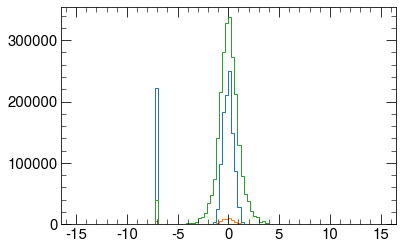

In [35]:
for i, c in zip([0,4,5,15],['C0','C1','C2','C3']):
    plt.hist(jvc[pdg==i].flatten(),100,(-15,15),histtype='step',color=c)

In [38]:
test = np.ones((10,1)) * np.arange(1,5).reshape(1,-1)
test

array([[1., 2., 3., 4.],
       [1., 2., 3., 4.],
       [1., 2., 3., 4.],
       [1., 2., 3., 4.],
       [1., 2., 3., 4.],
       [1., 2., 3., 4.],
       [1., 2., 3., 4.],
       [1., 2., 3., 4.],
       [1., 2., 3., 4.],
       [1., 2., 3., 4.]])

In [40]:
np.prod(test[:,:5],axis=1)

array([24., 24., 24., 24., 24., 24., 24., 24., 24., 24.])

In [42]:
btag = t.array('resolvedJets_is_DL1r_FixedCutBEff_77')

I mean, this plot is garbage b/c it has no event weights, but @ least I've convinced myself it's doing smth sensible. (Maybe I'll want to pass it through a 2d embedding layer tho b/c the peak @ -7 looks like default values to me tbh.

In [11]:
df_Qb = processDf(filename,pT_min=40,sort='Quantile_DL1r_Continuous')


Opening /gpfs/slac/atlas/fs1/d/nhartman/public/hh4b/kappa_lambda/user.valentem.HH4B.600043.HH_NLO.MC16a-2015-2016.AB21.2.91-APR20-1.full_MiniNTuple.root/user.valentem.21562918._000001.MiniNTuple.root
Loading in the event df
Running on mc
Loading in the jet array
  Jet sfs for evts with 1 selected jets out of 4 resolved jets
  Jet sfs for evts with 2 selected jets out of 4 resolved jets
  Jet sfs for evts with 3 selected jets out of 4 resolved jets
  Jet sfs for evts with 4 selected jets out of 4 resolved jets
  Jet sfs for evts with 1 selected jets out of 5 resolved jets
  Jet sfs for evts with 2 selected jets out of 5 resolved jets
  Jet sfs for evts with 3 selected jets out of 5 resolved jets
  Jet sfs for evts with 4 selected jets out of 5 resolved jets
  Jet sfs for evts with 5 selected jets out of 5 resolved jets
  Jet sfs for evts with 1 selected jets out of 6 resolved jets
  Jet sfs for evts with 2 selected jets out of 6 resolved jets
  Jet sfs for evts with 3 selected jets out

In [13]:
df_Qb.head()

eventNumber  nresolvedJets  weight_pileup  mcEventWeight  rand_run_nr  \
entry                                                                          
0           285795              6       1.148059       0.031172       300487   
1           285596              6       1.148059       0.031172       301932   
2           285944              5       1.040424       0.031172       303638   
3           286535              5       1.097209       0.031172       305543   
4           286990              7       1.182488       0.034985       279984   

            j0_pt    j0_eta    j0_phi        j0_E  j0_Db  ...  j1_drMatch  \
entry                                                     ...               
0      171.491760 -0.700876 -1.872831  216.089844      5  ...   10.000000   
1       99.345375 -2.102439  2.762055  412.845215      5  ...    0.031213   
2       83.805374  2.233748 -0.200301  395.757782      5  ...   10.000000   
3      324.497467  1.056266 -2.457010  526.199890      5  ...    0.079048   
4      442.594788  0.842337  1.651080  609.308472      5  ...    0.005462   

       j2_drMatch  j3_drMatch  j4_drMatch  j5_drMatch  correctPair  \
entry                                                                
0       10.000000   10.000000   10.000000        10.0           -1   
1        0.069670   10.000000    0.266357        10.0            5   
2       10.000000   10.000000   10.000000        10.0           -1   
3        0.311243    0.165292   10.000000        10.0           -1   
4        0.062052   10.000000   10.000000        10.0           -1   

       sameParent  unique  dRmatch  goodJets  
entry                                         
0            True   False     True     False  
1           False    True     True      True  
2            True   False     True     False  
3           False    True    False     False  
4            True   False    False     False  

[5 rows x 112 columns]

In [14]:
#np.sum(df_Qb.loc[df_Qb.goodJets,'mc_sf'])/np.sum(df_Qb['mc_sf'])

0.24987177079379255

In [18]:
m = np.ones_like(df_Qb.index).astype(bool)
for mi,l in zip([df_Qb.trigger,df_Qb.njets>=4,df_Qb.ntag>=2,df_Qb.ntag>=4],['trigger','4 jets','>= 2b','>=4b']):
    
    m = m & mi
    num = np.sum(df_Qb.loc[df_Qb.goodJets & m,'mc_sf'])
    den = np.sum(df_Qb.loc[m,'mc_sf'])
    print(l,num/den)

trigger 0.37115816055067125
4 jets 0.46552704878209633
>= 2b 0.46867420286164413
>=4b 0.8385866981814597


Ok, these are nice little tables, but I think it's *also* a good idea to just consider the 4b jet selection.

In [40]:
df_4lead = processDf(filename,pT_min=40,nJetsMax=4)


Opening /gpfs/slac/atlas/fs1/d/nhartman/public/hh4b/kappa_lambda/user.valentem.HH4B.600043.HH_NLO.MC16a-2015-2016.AB21.2.91-APR20-1.full_MiniNTuple.root/user.valentem.21562918._000001.MiniNTuple.root
Loading in the event df
Running on mc
Loading in the jet array
  Jet sfs for evts with 1 selected jets out of 4 resolved jets
  Jet sfs for evts with 2 selected jets out of 4 resolved jets
  Jet sfs for evts with 3 selected jets out of 4 resolved jets
  Jet sfs for evts with 4 selected jets out of 4 resolved jets
  Jet sfs for evts with 1 selected jets out of 5 resolved jets
  Jet sfs for evts with 2 selected jets out of 5 resolved jets
  Jet sfs for evts with 3 selected jets out of 5 resolved jets
  Jet sfs for evts with 4 selected jets out of 5 resolved jets
  Jet sfs for evts with 5 selected jets out of 5 resolved jets
  Jet sfs for evts with 1 selected jets out of 6 resolved jets
  Jet sfs for evts with 2 selected jets out of 6 resolved jets
  Jet sfs for evts with 3 selected jets out

In [22]:
df_4j = processDf(filename,pT_min=40,sort='Quantile_DL1r_Continuous',nJetsMax=4)


Opening /gpfs/slac/atlas/fs1/d/nhartman/public/hh4b/kappa_lambda/user.valentem.HH4B.600043.HH_NLO.MC16a-2015-2016.AB21.2.91-APR20-1.full_MiniNTuple.root/user.valentem.21562918._000001.MiniNTuple.root
Loading in the event df
Running on mc
Loading in the jet array
  Jet sfs for evts with 1 selected jets out of 4 resolved jets
  Jet sfs for evts with 2 selected jets out of 4 resolved jets
  Jet sfs for evts with 3 selected jets out of 4 resolved jets
  Jet sfs for evts with 4 selected jets out of 4 resolved jets
  Jet sfs for evts with 1 selected jets out of 5 resolved jets
  Jet sfs for evts with 2 selected jets out of 5 resolved jets
  Jet sfs for evts with 3 selected jets out of 5 resolved jets
  Jet sfs for evts with 4 selected jets out of 5 resolved jets
  Jet sfs for evts with 5 selected jets out of 5 resolved jets
  Jet sfs for evts with 1 selected jets out of 6 resolved jets
  Jet sfs for evts with 2 selected jets out of 6 resolved jets
  Jet sfs for evts with 3 selected jets out

In [24]:
print('4 jet selection')

m = np.ones_like(df_4j.index).astype(bool)
for mi,l in zip([df_4j.trigger,df_4j.njets>=4,df_4j.ntag>=2,df_4j.ntag>=4],['trigger','4 jets','>= 2b','>=4b']):
    
    m = m & mi
    num = np.sum(df_4j.loc[df_4j.goodJets & m,'mc_sf'])
    den = np.sum(df_4j.loc[m,'mc_sf'])
    print(l,num/den)

4 jet selection
trigger 0.3256637560002986
4 jets 0.4084654558077925
>= 2b 0.411322453512544
>=4b 0.7942738896580938


Sean was also interested in 4 lead

In [57]:
print('4 leading in pt jets (j for intuition)')

m = np.ones_like(df_4lead.index).astype(bool)
for mi,l in zip([df_4lead.trigger,df_4lead.njets>=4,df_4lead.ntag>=2,df_4lead.ntag>=4],['trigger','4 jets','>= 2b','>=4b']):
    
    m = m & mi
    num = np.sum(df_4lead.loc[df_4lead.goodJets & m,'mc_sf'])
    den = np.sum(df_4lead.loc[m,'mc_sf'])
    print(l,num/den)

4 leading in pt jets (j for intuition)
trigger 0.23631468398354205
4 jets 0.2967443556330242
>= 2b 0.3123397289244487
>=4b 0.8416938610728522


In [60]:
print('4 leading in pt jets (j for intuition)')

m = np.ones_like(df_4lead.index).astype(bool)
for mi,l in zip([df_4lead.trigger,df_4lead.njets>=4,df_4lead.ntag>=2,df_4lead.ntag>=4],['trigger','4 jets','>= 2b','>=4b']):
    
    m = m & mi
    #num = np.sum(df_4lead.loc[df_4lead.goodJets & m,'mc_sf'])
    den = np.sum(df_4lead.loc[m,'mc_sf'])
    print(l,den*sample_weight)

4 leading in pt jets (j for intuition)
trigger 4.295983664708108
4 jets 3.4211401256758225
>= 2b 3.24323416987796
>=4b 0.49009470366296015


In [28]:
?process4bs

In [29]:
df_pt = process4bs(filename,pT_min=40)


Opening /gpfs/slac/atlas/fs1/d/nhartman/public/hh4b/kappa_lambda/user.valentem.HH4B.600043.HH_NLO.MC16a-2015-2016.AB21.2.91-APR20-1.full_MiniNTuple.root/user.valentem.21562918._000001.MiniNTuple.root
Loading in the event df
Running on mc
Loading in the jet array
Applying 2016 triggers
len(df) 686712
  Jet sfs for evts with 4 selected jets out of 4 resolved jets
  Jet sfs for evts with 4 selected jets out of 5 resolved jets
  Jet sfs for evts with 5 selected jets out of 5 resolved jets
  Jet sfs for evts with 4 selected jets out of 6 resolved jets
  Jet sfs for evts with 5 selected jets out of 6 resolved jets
  Jet sfs for evts with 6 selected jets out of 6 resolved jets
  Jet sfs for evts with 4 selected jets out of 7 resolved jets
  Jet sfs for evts with 5 selected jets out of 7 resolved jets
  Jet sfs for evts with 6 selected jets out of 7 resolved jets
  Jet sfs for evts with 7 selected jets out of 7 resolved jets
  Jet sfs for evts with 4 selected jets out of 8 resolved jets
  Jet

In [30]:
print('4 jet selection (pt sort)')

m = np.ones_like(df_pt.index).astype(bool)
for mi,l in zip([df_pt.trigger,df_pt.njets>=4,df_pt.ntag>=2,df_pt.ntag>=4],['trigger','4 jets','>= 2b','>=4b']):
    
    m = m & mi
    num = np.sum(df_pt.loc[df_pt.goodJets & m,'mc_sf'])
    den = np.sum(df_pt.loc[m,'mc_sf'])
    print(l,num/den*100)

4 jet selection (pt sort)
trigger 31.57013326739119
4 jets 39.471554414244345
>= 2b 39.741626374191306
>=4b 79.3498032764376


Ok - let's compare the yields as well

In [37]:
i_mc = 600043
sample_weight = normalizeWeight(None,subDir,1,i_mc)

/gpfs/slac/atlas/fs1/d/nhartman/public/hh4b/kappa_lambda/user.valentem.HH4B.600043.HH_NLO.MC16a-2015-2016.AB21.2.91-APR20-1.full_MiniNTuple.root/user.valentem.21562918._000001.MiniNTuple.root
sum_weights_initial 26760.097015455365
Reading entry for DSID 600043:
  xsec 27.900000000000002
  k_factor 1.1129
  gen_filter_eff 0.3392
  sample_weight 0.0003935759076627092


In [38]:
print('4 jet selection (pt sort)')

m = np.ones_like(df_pt.index).astype(bool)
for mi,l in zip([df_pt.trigger,df_pt.njets>=4,df_pt.ntag>=2,df_pt.ntag>=4],['trigger','4 jets','>= 2b','>=4b']):
    
    m = m & mi
    den = np.sum(df_pt.loc[m,'mc_sf'])
    print(l,sample_weight*den)

4 jet selection (pt sort)
trigger 4.2777370616562695
4 jets 3.4214190731391856
>= 2b 3.3957021908301686
>=4b 0.8201575036236661


In [45]:
print('4 jet selection (Qb sort)')

m = np.ones_like(df_4j.index).astype(bool)
for mi,l in zip([df_4j.trigger,df_4j.njets>=4,df_4j.ntag>=2,df_4j.ntag>=4],['trigger','4 jets','>= 2b','>=4b']):
    
    m = m & mi
    den = np.sum(df_4j.loc[m,'mc_sf'])
    print(l,sample_weight*den)

4 jet selection (Qb sort)
trigger 4.304602091661018
4 jets 3.431998631278933
>= 2b 3.4056737780799704
>=4b 0.8193783872579636


In [61]:
text = "$\mathbf{ATLAS}$ Simulation Internal\n"
text += f"SMNR {mc}, APR2020 MNT prod\n"
text += f"4b DL1r 77% WP, {mcToYr[mc]} triggers"

/gpfs/slac/atlas/fs1/d/rafaeltl/public/conda/miniconda3/envs/py3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/gpfs/slac/atlas/fs1/d/rafaeltl/public/conda/miniconda3/envs/py3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/gpfs/slac/atlas/fs1/d/rafaeltl/public/conda/miniconda3/envs/py3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/gpfs/slac/atlas/fs1/d/rafaeltl/public/conda/miniconda3/envs/py3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


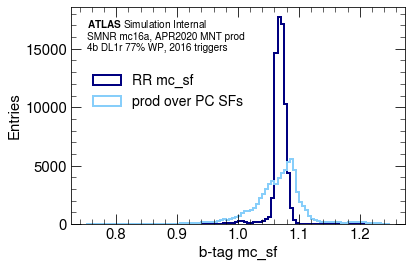

In [78]:
nb = 100
r = (0.75,1.25)

for df, m, c, l in zip([df_pt,df_4j],
                       [(df_pt.trigger)&(df_pt.ntag>=4),(df_4j.trigger)&(df_4j.ntag>=4)],
                       ['navy','lightskyblue'],
                       ['RR mc_sf','prod over PC SFs']):

    v = df.loc[m,'mc_sf']/(df.loc[m,'mcEventWeight']*df.loc[m,'weight_pileup'])
    plt.hist(v,nb,r,label=l,histtype='step',color=c,lw=2)

plt.xlabel('b-tag mc_sf')
plt.ylabel('Entries')
plt.legend(loc='upper left',bbox_to_anchor=(0.03,.75))

ax = plt.gca()
plt.text(0.05,0.95,text,ha='left',va='top',transform=ax.transAxes,fontsize=10)

plt.savefig('figures/SMNR_mc16a_PFlow-APR2020/intuitionPlots/mc_sf_4b_jetSort.pdf',bbox_inches='tight')
plt.show()

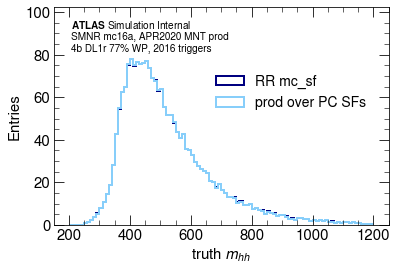

In [84]:
nb = 100
r = (200,1200)

for df, m, c, l in zip([df_pt,df_4j],
                       [(df_pt.trigger)&(df_pt.ntag>=4),(df_4j.trigger)&(df_4j.ntag>=4)],
                       ['navy','lightskyblue'],
                       ['RR mc_sf','prod over PC SFs']):

    plt.hist(df.loc[m,'truth_mhh'],nb,r,label=l,histtype='step',color=c,lw=2,
             weights=df.loc[m,'mc_sf'])

plt.xlabel('truth $m_{hh}$')
plt.ylabel('Entries')
plt.legend(loc='upper right',bbox_to_anchor=(0.97,.75))

_,ymax= plt.ylim()
plt.ylim(0,1.25*ymax)

ax = plt.gca()
plt.text(0.05,0.95,text,ha='left',va='top',transform=ax.transAxes,fontsize=10)

plt.savefig('figures/SMNR_mc16a_PFlow-APR2020/intuitionPlots/truth_mhh_4b_jetSort.pdf',bbox_inches='tight')
plt.show()

**Take away message:** The new jet sort seems *chill* for a new baseline :)

In [85]:
len(df_4j.index)

686712

**Step 2:** Pair them with $\min \Delta R_{jj}^{HC 1}$ and MDR+$\min D_{hh}$

In [93]:
df = df_4j[(df_4j.trigger)&(df_4j.njets>=4)&(df_4j.ntag >= 3)].copy()

In [89]:
len(df)

221028

In [90]:
from preprocess import allPairsParallel, min_dR1, MDR_minDhh, applyCuts4jets

In [94]:
allPairsParallel(df)

pair 0: (0, 1) (2, 3)
pair 1: (0, 2) (1, 3)
pair 2: (0, 3) (1, 2)


In [95]:
min_dR1(df)

In [98]:
applyCuts4jets(df)

Calculating Xhh


In [99]:
for c in df.columns:
    print(c)

eventNumber
nresolvedJets
weight_pileup
mcEventWeight
rand_run_nr
j0_pt
j0_eta
j0_phi
j0_E
j0_Db
j0_sf
j1_pt
j1_eta
j1_phi
j1_E
j1_Db
j1_sf
j2_pt
j2_eta
j2_phi
j2_E
j2_Db
j2_sf
j3_pt
j3_eta
j3_phi
j3_E
j3_Db
j3_sf
njets
X_wt
HT_all
lead_pt
lead_tag
ntag_all
mc_sf
HLT_2j35_bmv2c2060_split_2j35_L14J15.0ETA25
HLT_j100_2j55_bmv2c2060_split
HLT_j225_bmv2c2060_split
trigger
run_number
ntag
GNNJets
h0_pt
h0_eta
h0_phi
h0_E
h0_barcode
h1_pt
h1_eta
h1_phi
h1_E
h1_barcode
b0_pt
b0_eta
b0_phi
b0_E
b0_parent_barcode
b1_pt
b1_eta
b1_phi
b1_E
b1_parent_barcode
b2_pt
b2_eta
b2_phi
b2_E
b2_parent_barcode
b3_pt
b3_eta
b3_phi
b3_E
b3_parent_barcode
truth_mhh
truth_pthh
b0_jidx
b0_drMatch
b1_jidx
b1_drMatch
b2_jidx
b2_drMatch
b3_jidx
b3_drMatch
j0_bidx
j1_bidx
j2_bidx
j3_bidx
j0_drMatch
j1_drMatch
j2_drMatch
j3_drMatch
correctPair
sameParent
unique
dRmatch
goodJets
pT_h1_pair0
eta_h1_pair0
phi_h1_pair0
m_h1_pair0
pT_h2_pair0
eta_h2_pair0
phi_h2_pair0
m_h2_pair0
dRjj_h1_pair0
dRjj_h2_pair0
dPhi_h1_pair0
d

In [ ]:
df['abs_deta_h']

In [158]:
mindR1_masks = [
    df.njets>=4,
    df.cut_deta_hh,
    df.cut_Xwt,
    df.kinematic_region==0
]

In [126]:
text = "$\mathbf{ATLAS}$ Simulation Internal\n"
text += f"SMNR {mc}, APR2020 MNT prod\n"
text += f"DL1r 77% WP, {mcToYr[mc]} triggers"

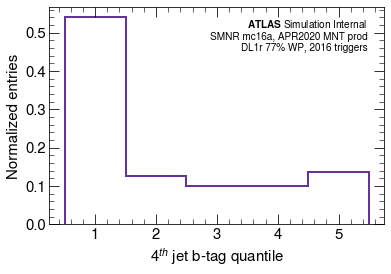

In [142]:
n,_,_ = plt.hist(df.j3_Db,5,(0.5,5.5),histtype='step',#11,(0.25,5.75)
                 weights=df.mc_sf,lw=2,density=True,color='rebeccapurple')

plt.xlabel('$4^{th}$ jet b-tag quantile')
plt.ylabel('Normalized entries')

# _,ymax= plt.ylim()
# plt.ylim(0,1.3*ymax)

ax = plt.gca()
plt.text(0.95,0.95,text,ha='right',va='top',transform=ax.transAxes,fontsize=10)

plt.savefig('figures/SMNR_mc16a_PFlow-APR2020/intuitionPlots/j3_Db_Qb_sort.pdf',bbox_inches='tight')

In [141]:
n[0],n[1],np.sum(n[2:])

(0.539725211188566, 0.12491618447912448, 0.33535860433230946)

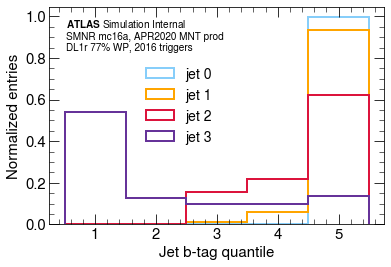

In [138]:
for i,c in enumerate(['lightskyblue','orange','crimson','rebeccapurple']):
    n,_,_ = plt.hist(df[f'j{i}_Db'],5,(0.5,5.5),histtype='step',color=c,
                     weights=df.mc_sf,lw=2,density=True,label=f'jet {i}')

plt.xlabel('Jet b-tag quantile')
plt.ylabel('Normalized entries')
plt.legend(loc='upper left',bbox_to_anchor=(.25,.78))

# _,ymax= plt.ylim()
# plt.ylim(0,1.3*ymax)

ax = plt.gca()
plt.text(0.05,0.95,text,ha='left',va='top',transform=ax.transAxes,fontsize=10)

plt.savefig('figures/SMNR_mc16a_PFlow-APR2020/intuitionPlots/j_Db_Qb_sort.pdf',bbox_inches='tight')

In [170]:
from processMC import L

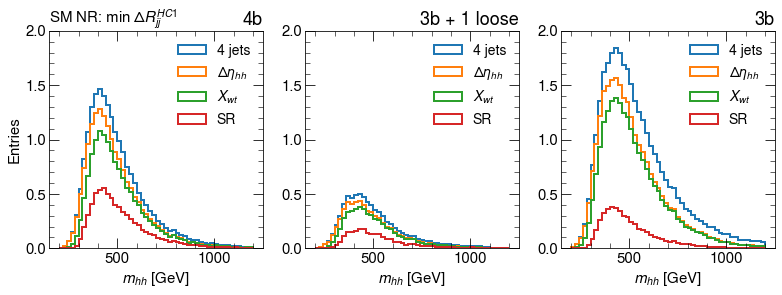

In [173]:
fig, axes = plt.subplots(1,3,figsize=(13,4))

m = np.ones_like(df.index).astype(bool)

for mi,l in zip(mindR1_masks,['4 jets','$\Delta \eta_{hh}$','$X_{wt}$','SR']):
    m = m & mi
    for ax,btag in zip(axes,[df.j3_Db >=3,df.j3_Db ==2,df.j3_Db==1]):
        
        
        ax.hist(df.loc[m & btag,'m_hh'],50,(200,1200),histtype='step',lw=2,
                 weights=sample_weight*L[mcToYr[mc]]*df.loc[m & btag,'mc_sf'],label=l)
    
for ax,t in zip(axes,['4b','3b + 1 loose','3b']):
    ax.set_xlabel('$m_{hh}$ [GeV]')
    ax.legend()
    ax.set_title(t,loc='right')
    ax.set_ylim(0,2)
axes[0].text(0,1,'SM NR: $\min \ \Delta R_{jj}^{HC 1}$',ha='left',va='bottom',
             transform=axes[0].transAxes)
axes[0].set_ylabel('Entries')
plt.savefig('figures/SMNR_mc16a_PFlow-APR2020/intuitionPlots/m_hh_mindR1.pdf',bbox_inches='tight')

Cool, cool, cool.

But so that I have *something* to compare this to, let's *also* compare this with MDR+$\min(D_{hh})$

In [165]:
df_dhh = df.copy()
MDR_minDhh(df_dhh)
applyCuts4jets(df_dhh)

Calculating Xhh


/gpfs/slac/atlas/fs1/d/rafaeltl/public/conda/miniconda3/envs/py3/lib/python3.7/site-packages/uproot_methods/classes/TLorentzVector.py:216: RuntimeWarning: invalid value encountered in true_divide
  out["fX"] = self.x / self.t
/gpfs/slac/atlas/fs1/d/rafaeltl/public/conda/miniconda3/envs/py3/lib/python3.7/site-packages/uproot_methods/classes/TLorentzVector.py:217: RuntimeWarning: invalid value encountered in true_divide
  out["fY"] = self.y / self.t
/gpfs/slac/atlas/fs1/d/rafaeltl/public/conda/miniconda3/envs/py3/lib/python3.7/site-packages/uproot_methods/classes/TLorentzVector.py:218: RuntimeWarning: invalid value encountered in true_divide
  out["fZ"] = self.z / self.t
/gpfs/slac/atlas/fs1/d/rafaeltl/public/conda/miniconda3/envs/py3/lib/python3.7/site-packages/awkward/array/table.py:699: RuntimeWarning: invalid value encountered in true_divide
  newcolumns[n] = getattr(ufunc, method)(*x, **kwargs)


In [167]:
df_dhh.head()

eventNumber  nresolvedJets  weight_pileup  mcEventWeight  rand_run_nr  \
entry                                                                          
3           286535              5       1.097209       0.031172       305543   
4           286990              7       1.182488       0.034985       279984   
7           285372              5       0.882703       0.031172       311365   
8           286268              8       0.874719       0.031172       306269   
9           286648              5       0.837192       0.031172       301973   

            j0_pt    j0_eta    j0_phi        j0_E  j0_Db  ...     eta_i  \
entry                                                     ...             
3      324.497467  1.056266 -2.457010  526.199890      5  ...  0.812823   
4      442.594788  0.842337  1.651080  609.308472      5  ...  0.728415   
7       90.420914 -0.478221  0.800705  101.461746      5  ...  1.029900   
8      120.845940  0.708957  0.512131  153.004074      5  ...  0.791123   
9      103.905296  1.473665 -1.613765  238.963760      5  ...  1.565973   

         dRjj_1    dRjj_2  cosThetaStar    m_hh_cor          HT  event_number  \
entry                                                                           
3      0.604275  0.648715      0.370744  938.148614  705.844494        286535   
4      0.822796  2.915632           NaN         NaN  980.266678        286990   
7      1.459777  1.535984     -0.654351  457.370146  328.495583        285372   
8      0.931950  1.134809      0.356136  559.129739  461.387711        286268   
9      1.411905  1.514777      0.000916  398.623344  366.748444        286648   

        Dhh_pair0  Dhh_pair1   Dhh_pair2  
entry                                     
3       28.481130   1.385452  301.466425  
4      304.138212  11.531484  426.182873  
7        5.162433  46.455537   96.816364  
8        5.881043  25.417179   30.525670  
9       46.315891   0.229348   66.967096  

[5 rows x 169 columns]

In [176]:
Dhh_masks = [
    df_dhh.nValidPairs>=1,
    df_dhh.cut_deta_hh,
    df_dhh.cut_Xwt,
    df_dhh.kinematic_region==0
]

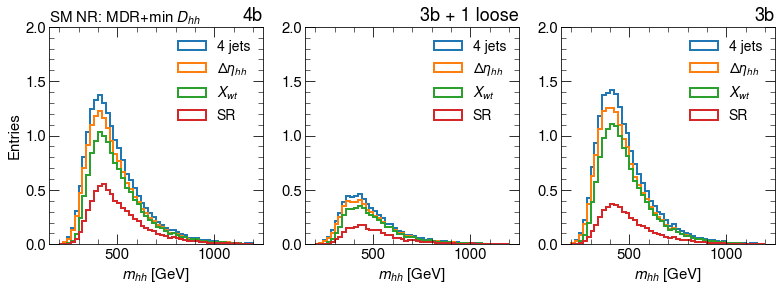

In [181]:
fig, axes = plt.subplots(1,3,figsize=(13,4))

m = np.ones_like(df_dhh.index).astype(bool)

for mi,l in zip(Dhh_masks,['4 jets','$\Delta \eta_{hh}$','$X_{wt}$','SR']):
    m = m & mi
    for ax,btag in zip(axes,[df_dhh.j3_Db >=3,df_dhh.j3_Db ==2,df_dhh.j3_Db==1]):
        
        
        ax.hist(df_dhh.loc[m & btag,'m_hh'],50,(200,1200),histtype='step',lw=2,
                 weights=sample_weight*L[mcToYr[mc]]*df_dhh.loc[m & btag,'mc_sf'],
                label=l)
    
for ax,t in zip(axes,['4b','3b + 1 loose','3b']):
    ax.set_xlabel('$m_{hh}$ [GeV]')
    ax.legend()
    ax.set_title(t,loc='right')
    ax.set_ylim(0,2)
axes[0].text(0,1,'SM NR: MDR+$\min \ D_{hh}$',ha='left',va='bottom',
             transform=axes[0].transAxes)
axes[0].set_ylabel('Entries')
plt.savefig('figures/SMNR_mc16a_PFlow-APR2020/intuitionPlots/m_hh_minDhh_noMDpT.pdf',bbox_inches='tight')

In [204]:
options = {'SB_color':'navy','CR_color':'darkorange','SR_color':'hotpink'}
ls = '--'
lw=1.2

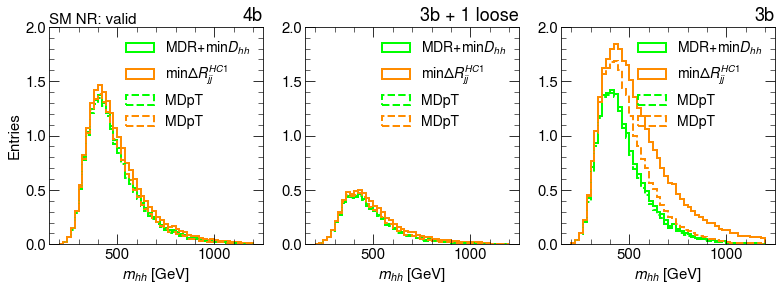

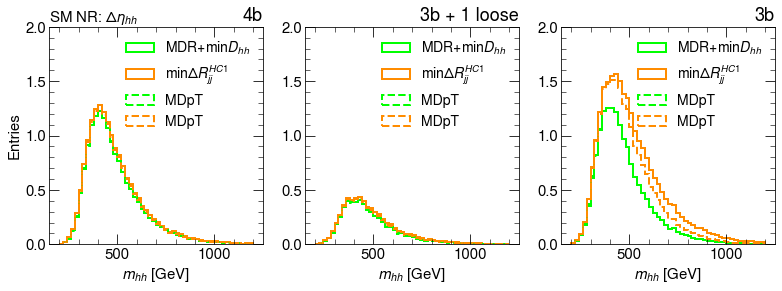

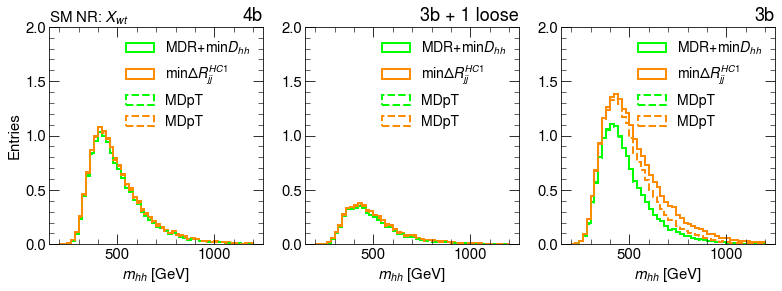

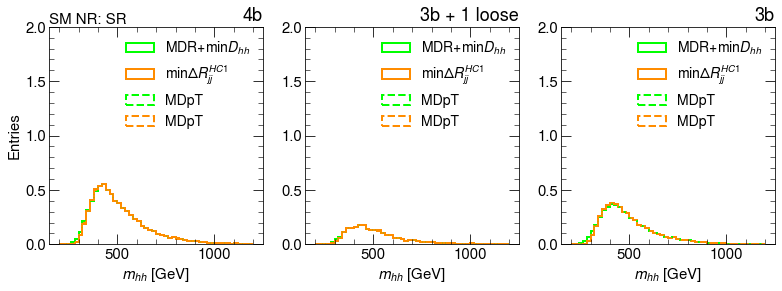

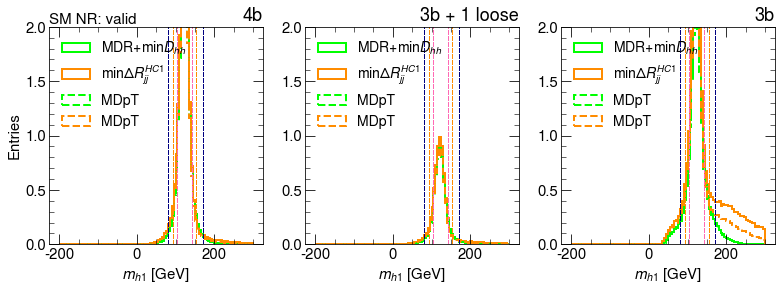

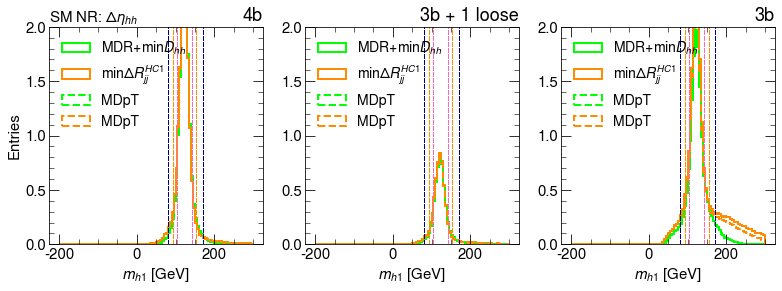

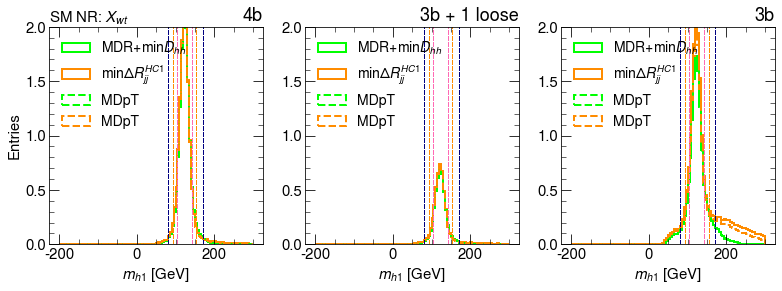

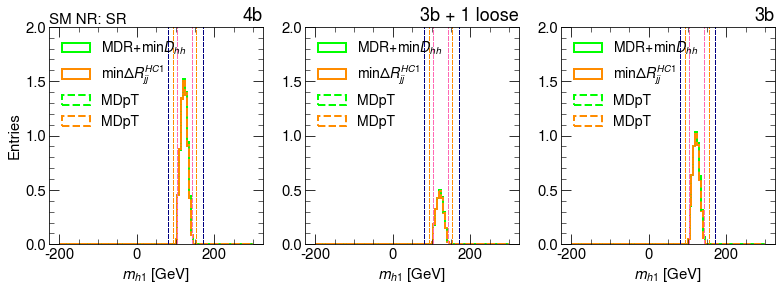

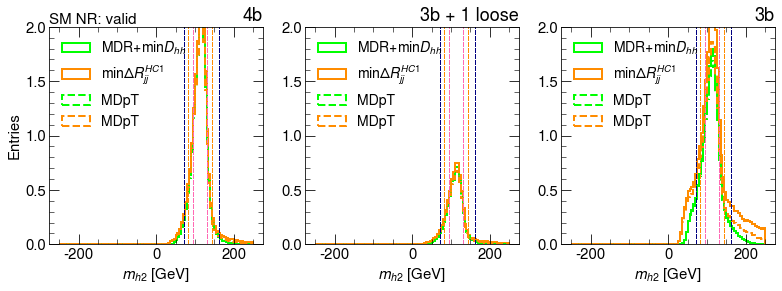

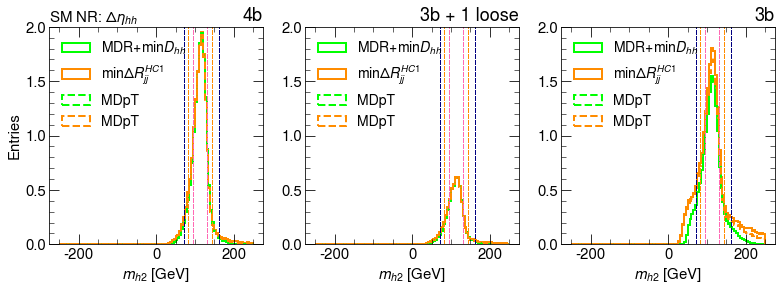

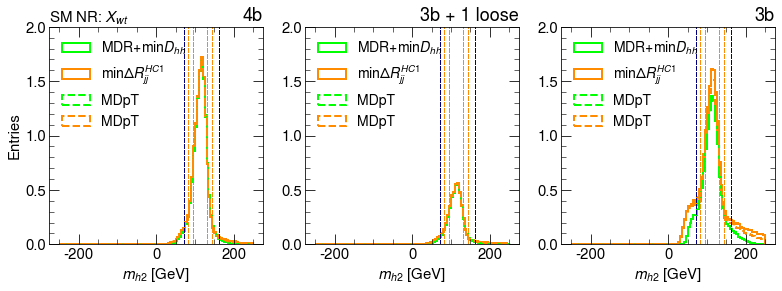

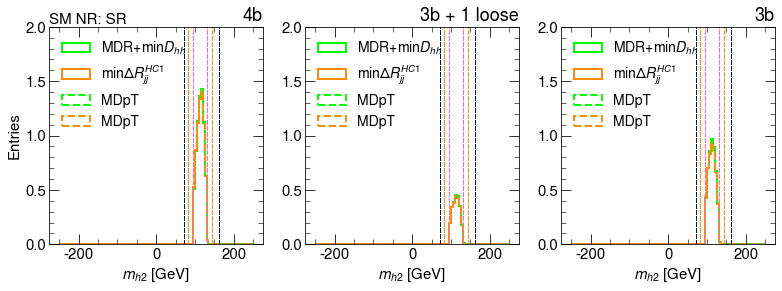

In [216]:
for c, nb,r,xl in zip(['m_hh','m_h1','m_h2'],[50,100,100],
                      [(200,1200),(-200,300),(-250,250)],
                      ['$m_{hh}$','$m_{h1}$','$m_{h2}$']):

    m1 = np.ones_like(df_dhh.index).astype(bool)
    m2 = np.ones_like(df.index).astype(bool)
    loc = 'upper right' if c == 'm_hh' else 'upper left'
    
    for mi,mj,l,t in zip(Dhh_masks,mindR1_masks,
                         ['valid','$\Delta \eta_{hh}$','$X_{wt}$','SR'],
                         ['valid','deta','Xwt','SR']):

        fig, axes = plt.subplots(1,3,figsize=(13,4))

        m1 = m1 & mi
        m2 = m2 & mj

        # Since the jet selection is the same b/w the 2 categories, the category div
        # is the same as well
        for ax,btag in zip(axes,[df.j3_Db >=3,df.j3_Db ==2,df.j3_Db==1]):

            ax.hist(df_dhh.loc[m1 & btag,c],nb,r,histtype='step',lw=2,
                    weights=sample_weight*L[mcToYr[mc]]*df_dhh.loc[m1 & btag,'mc_sf'],
                    label='MDR+$\min D_{hh}$',color='lime')

            ax.hist(df.loc[m2 & btag,c],nb,r,histtype='step',lw=2,
                    weights=sample_weight*L[mcToYr[mc]]*df.loc[m2 & btag,'mc_sf'],
                    label='$\min \Delta R_{jj}^{HC1}$',color='darkorange')

            ax.hist(df_dhh.loc[m1 & btag & df_dhh.MDpT,c],nb,r,histtype='step',lw=2,
                    weights=sample_weight*L[mcToYr[mc]]*df_dhh.loc[m1 & btag & df_dhh.MDpT,'mc_sf'],
                    label='MDpT',color='lime',ls='--')

            ax.hist(df.loc[m2 & btag & df.MDpT,c],nb,r,histtype='step',lw=2,
                    weights=sample_weight*L[mcToYr[mc]]*df.loc[m2 & btag & df.MDpT,'mc_sf'],
                    label='MDpT',color='darkorange',ls='--')

            
            if c == 'm_h1':
                ax.axvline(min(SB_x), color = options['SB_color'], ls = ls, lw = lw)
                ax.axvline(max(SB_x), color = options['SB_color'], ls = ls, lw = lw)
                ax.axvline(min(CR_x), color = options['CR_color'], ls = ls, lw = lw)
                ax.axvline(max(CR_x), color = options['CR_color'], ls = ls, lw = lw)
                ax.axvline(min(SR_x), color = options['SR_color'], ls = ls, lw = lw)
                ax.axvline(max(SR_x), color = options['SR_color'], ls = ls, lw = lw)

            if c == 'm_h2':
                ax.axvline(max(SB_y1), color = options['SB_color'], ls = ls, lw = lw)
                ax.axvline(min(SB_y2), color = options['SB_color'], ls = ls, lw = lw)
                ax.axvline(max(CR_y1), color = options['CR_color'], ls = ls, lw = lw)
                ax.axvline(min(CR_y2), color = options['CR_color'], ls = ls, lw = lw)
                ax.axvline(min(SR_y1), color = options['SR_color'], ls = ls, lw = lw)
                ax.axvline(max(SR_y2), color = options['SR_color'], ls = ls, lw = lw)
            
            
        for ax,t in zip(axes,['4b','3b + 1 loose','3b']):
            ax.set_xlabel(f'{xl} [GeV]')
            ax.legend(loc=loc)
            ax.set_title(t,loc='right')
            ax.set_ylim(0,2)
        axes[0].text(0,1,f'SM NR: {l}',ha='left',va='bottom',
                     transform=axes[0].transAxes)
        axes[0].set_ylabel('Entries')
        plt.savefig(f'figures/SMNR_mc16a_PFlow-APR2020/intuitionPlots/{c}_4j_pairing_{t}.pdf',bbox_inches='tight')

Ok, at first blush I thought the A here was that pairing wasn't a important issue, and maybe this is true.

But I'll also compare to the $m_h1$ and $m_{h2}$ here.


In [200]:
max(SB_y1), min(SB_y1)

(160.99062792867062, 116.0)

In [201]:
max(SB_y2), min(SB_y2)

(116.0, 71.00937207132938)

In [215]:
min(SR_y1),max(SR_y1), min(SR_y2),max(SR_y2)

(94.8295992803556, 109.99999953638468, 110.00000046361534, 130.94854215598306)

Ok, I can keep going (ofc) but for now, let's save the dfs.

In [220]:
# df['mc_sf'] = sample_weight * L[mcToYr[mc]] * df['mc_sf']
# df_dhh['mc_sf'] = sample_weight * L[mcToYr[mc]] * df_dhh['mc_sf']

In [221]:
df.to_hdf(f'../data/{subDir}/df_min_dR1_3b_Qb_sort.h5',key='df')
df_dhh.to_hdf(f'../data/{subDir}/df_MDR_3b_Qb_sort.h5',key='df')

In [217]:
f'../data/{subDir}'

'../data/SMNR_mc16a_PFlow-APR2020'

In [218]:
%%bash
ls ../data/SMNR_mc16a_PFlow-APR2020

df_MDR_2b.h5
df_MDR_3b.h5
df_MDR.h5
df_min_dR1_2b.h5
df_min_dR1_3b.h5
files
